In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os
import tensorflow as tf
import PIL #image libary in python
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Load Flowers DataSet

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.',untar=True)
# cach_dir indicates where to download data. I specified which means current directory
# untar true will unzip it

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
data_dir = pathlib.Path(data_dir)
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/dandelion/4633514720_22e82c5f7c_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14278605962_d3cce5522f.jpg'),
 PosixPath('datasets/flower_photos/dandelion/15297244181_011883a631_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/10617191174_9a01753241_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/5675705011_82729927ca_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/19443726008_8c9c68efa7_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3591588855_b4fd53b000.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2478018280_1be353ca8c_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/5767676943_4f9c7323f3_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/18243329421_771b4d938e.jpg'),
 PosixPath('datasets/flower_photos/dandelion/18001393975_2a6acaabd8.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2521811279_1f7fc353bf_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3584415133_a4122ab7b9.jpg'),
 PosixPath('data

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/4633514720_22e82c5f7c_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14278605962_d3cce5522f.jpg'),
 PosixPath('datasets/flower_photos/dandelion/15297244181_011883a631_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/10617191174_9a01753241_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/5675705011_82729927ca_n.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/1793211631_68c31a74dc.jpg'),
 PosixPath('datasets/flower_photos/roses/12450781274_eb78723921.jpg'),
 PosixPath('datasets/flower_photos/roses/568715474_bdb64ccc32.jpg'),
 PosixPath('datasets/flower_photos/roses/2863863372_605e29c03e_m.jpg'),
 PosixPath('datasets/flower_photos/roses/17302463621_d82be11f01_n.jpg')]

In [ ]:
image_rose_count = len(list(data_dir.glob('roses/*')))
print(image_rose_count)

641


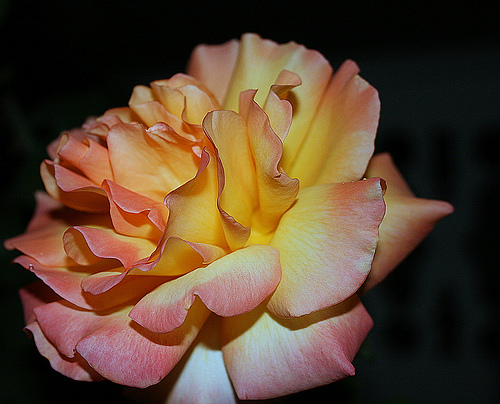

In [ ]:
PIL.Image.open(str(roses[0]))

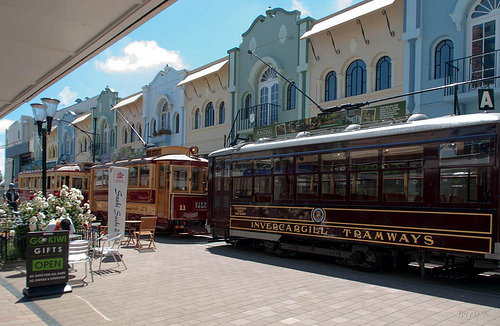

In [ ]:
PIL.Image.open(str(roses[1]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/1793211631_68c31a74dc.jpg'),
 PosixPath('datasets/flower_photos/roses/12450781274_eb78723921.jpg'),
 PosixPath('datasets/flower_photos/roses/568715474_bdb64ccc32.jpg'),
 PosixPath('datasets/flower_photos/roses/2863863372_605e29c03e_m.jpg'),
 PosixPath('datasets/flower_photos/roses/17302463621_d82be11f01_n.jpg')]

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/1793211631_68c31a74dc.jpg'

In [ ]:
img = cv.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(404, 500, 3)

In [ ]:
img = cv.imread(str(flowers_images_dict['roses'][1]))
img.shape

(326, 500, 3)

In [ ]:
cv.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X,y = [],[]
for flower_name,images in flowers_images_dict.items():
    for image in images:
        img = cv.imread(str(image))
        resized_img = cv.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes=5
model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 95s 1s/step - loss: 1.4354 - accuracy: 0.4041
Epoch 2/10
86/86 [==============================] - 99s 1s/step - loss: 1.0929 - accuracy: 0.5618
Epoch 3/10
86/86 [==============================] - 91s 1s/step - loss: 0.9264 - accuracy: 0.6424
Epoch 4/10
86/86 [==============================] - 89s 1s/step - loss: 0.7458 - accuracy: 0.7191
Epoch 5/10
86/86 [==============================] - 92s 1s/step - loss: 0.5601 - accuracy: 0.7896
Epoch 6/10
86/86 [==============================] - 94s 1s/step - loss: 0.3773 - accuracy: 0.8645
Epoch 7/10
86/86 [==============================] - 89s 1s/step - loss: 0.2282 - accuracy: 0.9241
Epoch 8/10
86/86 [==============================] - 90s 1s/step - loss: 0.1330 - accuracy: 0.9578
Epoch 9/10
86/86 [==============================] - 98s 1s/step - loss: 0.0904 - accuracy: 0.9760
Epoch 10/10
86/86 [==============================] - 91s 1s/step - loss: 0.0467 - accuracy: 0.9866


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 11s 356ms/step - loss: 1.7297 - accuracy: 0.6253


[1.7296839952468872, 0.6252723336219788]

In [ ]:
x_predicted = model.predict(X_test_scaled)

29/29 [==============================] - 10s 358ms/step
